
Result from the remote Quantum Inspire backend:

State	Counts
010	1024

Result from the local Qiskit simulator backend:

{'010': 1024}


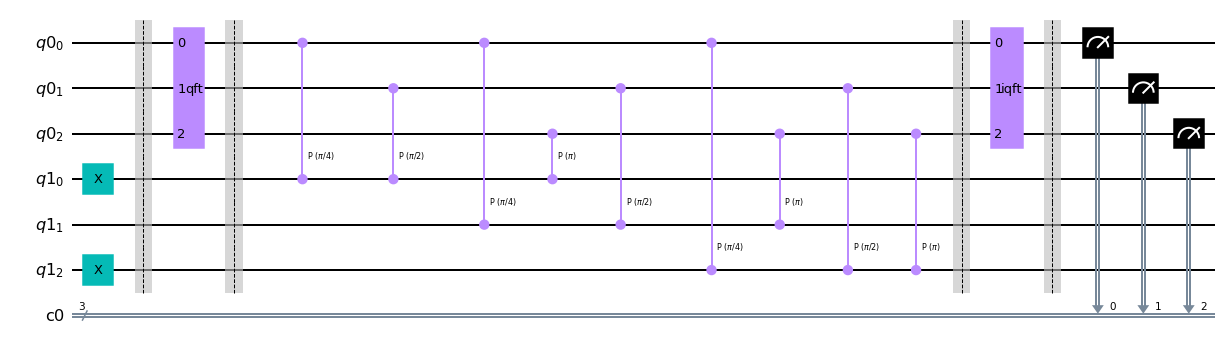

In [1]:
import os
import math

from getpass import getpass
from coreapi.auth import BasicAuthentication
from qiskit import BasicAer, execute
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit

from quantuminspire.credentials import get_authentication
from quantuminspire.qiskit import QI
from qiskit.circuit.library.standard_gates import PhaseGate
from qiskit.circuit.library.basis_change import QFT
import numpy as np
import matplotlib.pyplot as plt
import math
from src.artihmetic.counter import count

QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

authentication = get_authentication()
QI.set_authentication(authentication, QI_URL)
qi_backend = QI.get_backend('QX single-node simulator')

q = QuantumRegister(3)
a = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, a, c)

qc.x(a[0])
qc.x(a[2])

qc = count(qc, q, a)

# Should equal 010
qc.measure(q[:], c[:])

qi_job = execute(qc, backend=qi_backend, shots=1024)
qi_result = qi_job.result()
histogram = qi_result.get_counts(qc)
print("\nResult from the remote Quantum Inspire backend:\n")
print('State\tCounts')
[print('{0}\t{1}'.format(state, counts)) for state, counts in histogram.items()]

print("\nResult from the local Qiskit simulator backend:\n")
backend = BasicAer.get_backend("qasm_simulator")
job = execute(qc, backend=backend, shots=1024)
result = job.result()
print(result.get_counts(qc))
qc.draw(output="mpl")